In [2]:
def make_heatmap(image,keypoint,sigma):
    col,row,_=image.shape
    n_sigma=4
    n_keypoints=17
    stride=1
    keypoint_maps=np.zeros(shape=(n_keypoints,
                             col,row),dtype=np.float32)
    
    list_heatmap=[]
    for n,i in enumerate(keypoint_maps):
        if keypoint[n][2] != 0:
            x,y=keypoint[n][0],keypoint[n][1]
            heatmap1=heatmap(n_sigma,x,y,stride,sigma,i)
            list_heatmap.append(heatmap1)
        elif keypoint[n][2] == 0:
            list_heatmap.append(i)
    
    return list_heatmap

In [3]:
def heatmap(n_sigma,x,y,stride,sigma,keypoint_map):
    tl = [int(x - n_sigma * sigma), int(y - n_sigma * sigma)]
    tl[0]=max(tl[0],0)
    tl[1]=max(tl[1],0)
    br = [int(x + n_sigma * sigma), int(y + n_sigma * sigma)]
    map_h, map_w = keypoint_map.shape
    br[0] = min(br[0], map_w * stride)
    br[1] = min(br[1], map_h * stride)
    shift=stride/2-0.5
    for map_y in range(tl[1] // stride, br[1] // stride):
        for map_x in range(tl[0] // stride, br[0] // stride):
            d2=(map_x*stride+shift-x)*(map_x * stride + shift - x)+(map_y * stride + shift - y) * (map_y * stride + shift - y)
            exponent = d2 / 2 / sigma / sigma
            if exponent>4.6052: # threshold, ln(100), ~0.01
                continue
            
            keypoint_map[map_y,map_x]+=math.exp(-exponent)
            if keypoint_map[map_y,map_x]>1:
                keypoint_map[map_y,map_x]=1
    return keypoint_map

In [4]:
import numpy as np
import math
image=np.load('/home/lab/양창희/Pose Estimation/Dataset/COCO/Train2017/image1.npy')
keypoint=np.load('/home/lab/양창희/Pose Estimation/Dataset/COCO/Train2017/kp1.npy')

In [5]:
import cv2
import matplotlib.pyplot as plt

In [6]:
keypoint_name=('nose','left_eye','right_eye','left_ear','right_ear','left_shoulder',
              'right_shoulder','left_elbow','right_elbow','left_wrist','right_wrist',
              'left_hip','right_hip','left_knee','right_knee','left_ankle','right_ankle')

In [7]:
def Visualization_heatmap(image,keypoint,index,sigma):
    kp=make_heatmap(image[index],keypoint[index],sigma)
    kp=np.array(kp)
    img=image[index]
    img=img/255
    for i in kp:
        bb=cv2.cvtColor(i,cv2.COLOR_GRAY2RGB)
        img+=bb
    plt.imshow(img)
    fig=plt.figure(figsize=(30,30))
    for n,i in enumerate(kp):
        plt.subplot(4,5,n+1)
        plt.imshow(i)
        plt.ylabel(keypoint[index][n][2])
        plt.xlabel(keypoint_name[n])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


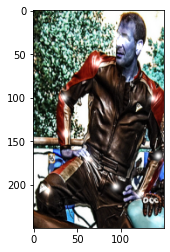

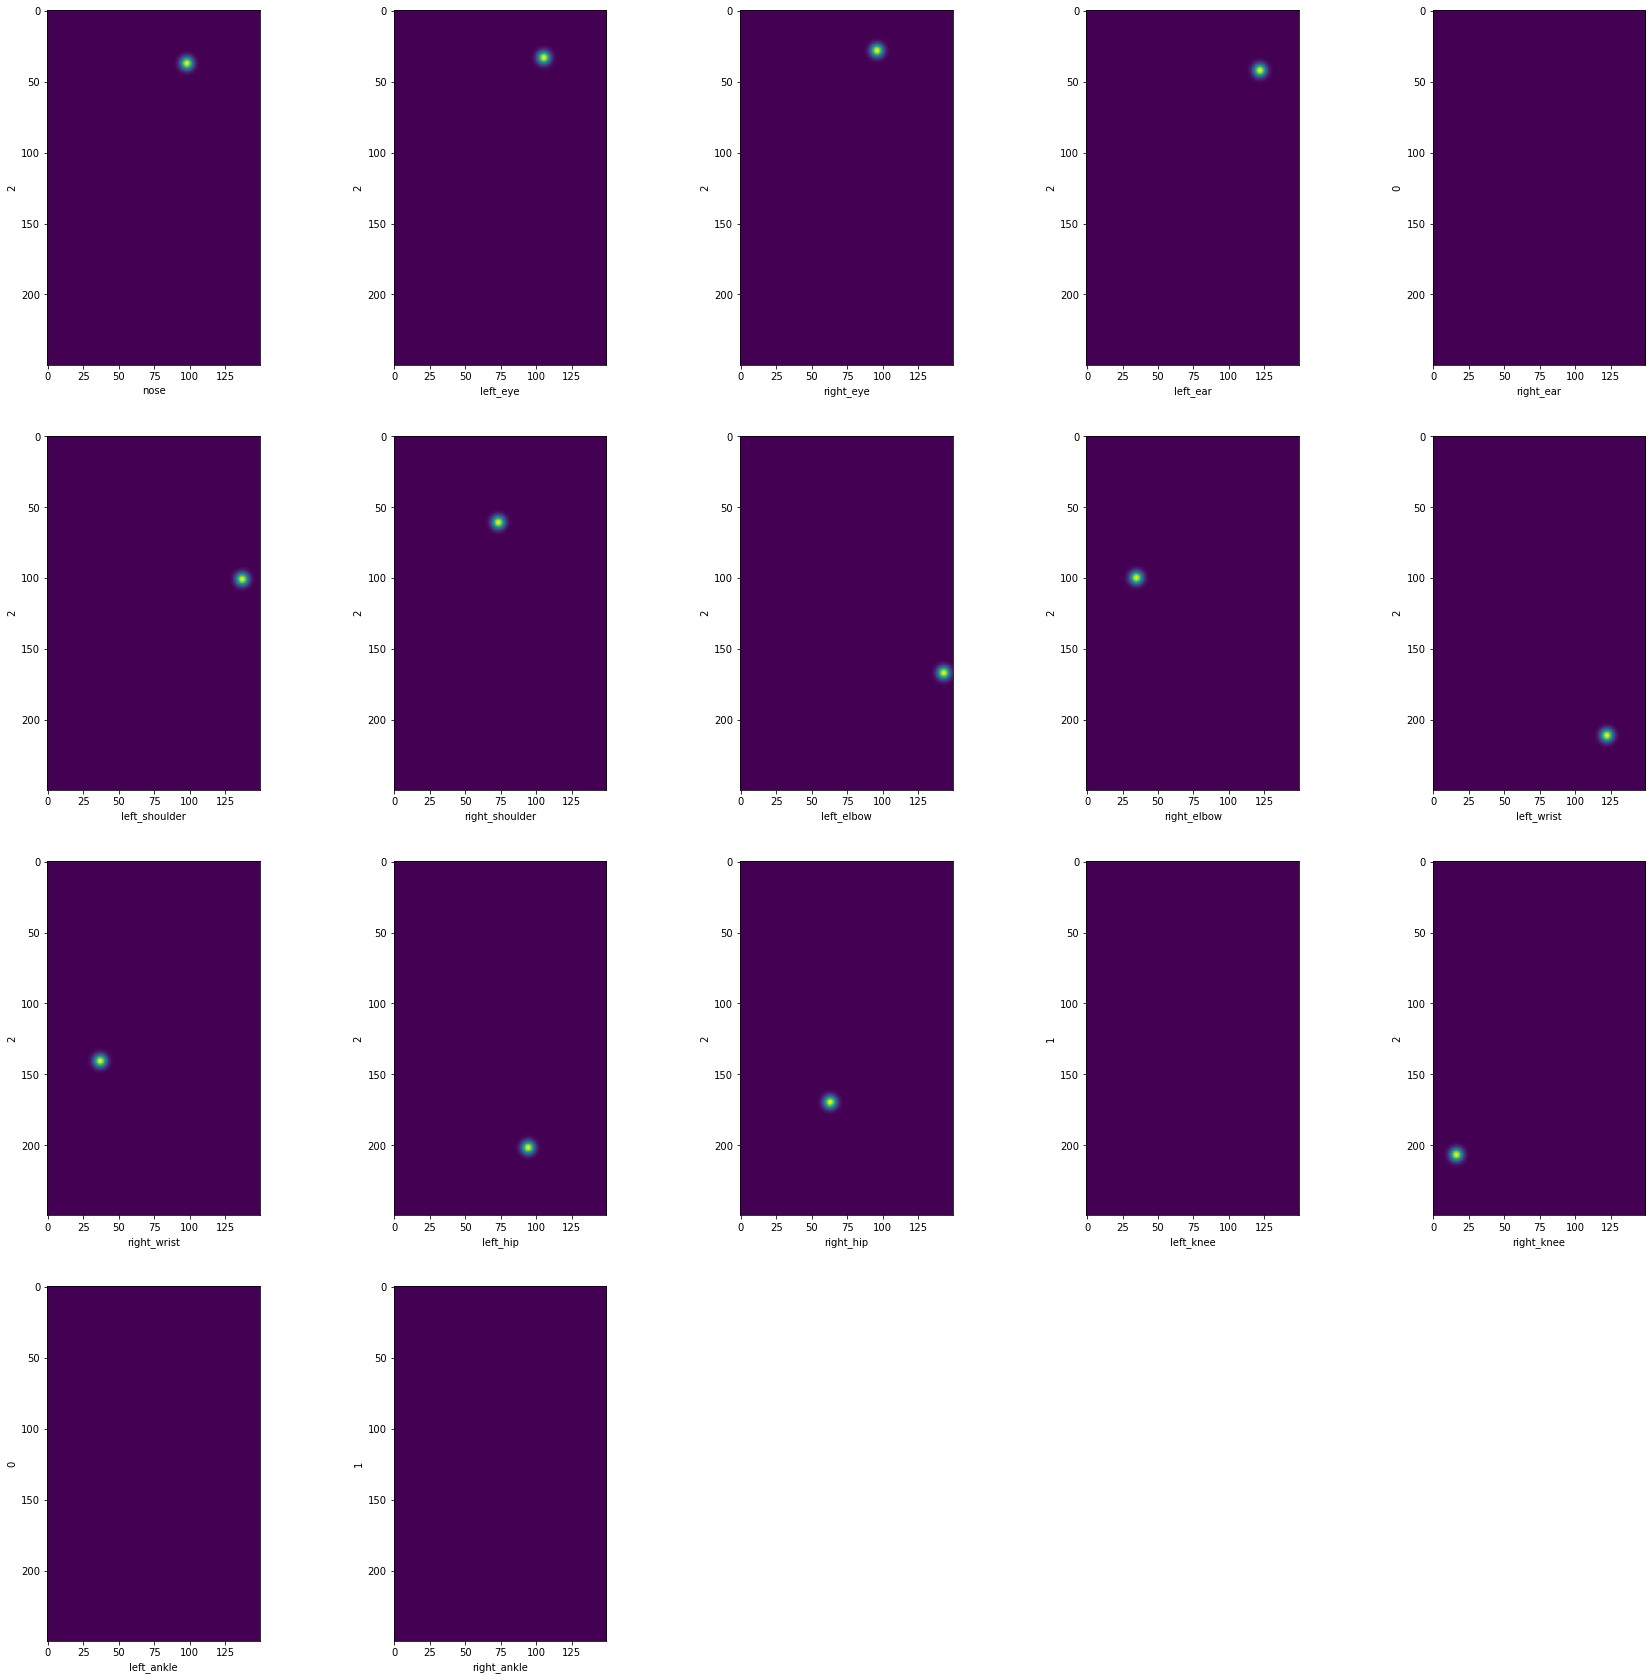

In [8]:
Visualization_heatmap(image,keypoint,150,3)